**Importing the Required Libraries**

In [ ]:
#which allows us to easily manage different paths in the code
import os

In [ ]:
#Used to return all file path that match
import glob

In [ ]:
from IPython.display import Image, display

In [ ]:
from IPython import display

In [ ]:
display.clear_output()

**Checking the access to the GPU**

In [ ]:
!nvidia-smi

Sun Mar 24 06:23:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = "/content/"

In [ ]:
print(HOME)

/content/


**Installing the YOLOv8**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

**Checking whether YOLOv8 is Installed and its working Fine**

In [ ]:
import ultralytics

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.9/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd {HOME}/datasets

/content/datasets


**Importing Tomato leaf disease Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HkV5atOoCibO4fQcK9Ly")
project = rf.workspace("forfun-cyh93").project("tomatoes_diseases")
version = project.version(1)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.33, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Tomatoes_diseases-1 in yolov8:: 100%|██████████| 4804/4804 [00:01<00:00, 3542.90it/s]


**Train the YOLOv8 Model on the Dataset**

In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8l.pt data=/content/datasets/Tomatoes_leaf_diseases/data.yaml epochs=10 imgsz=600

/content
100% 83.7M/83.7M [00:01<00:00, 75.2MB/s]
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/Tomatoes_leaf_diseases/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1711261916.f4fbaf9724af.2738.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


**Displaying the Confusion Matrix**

/content


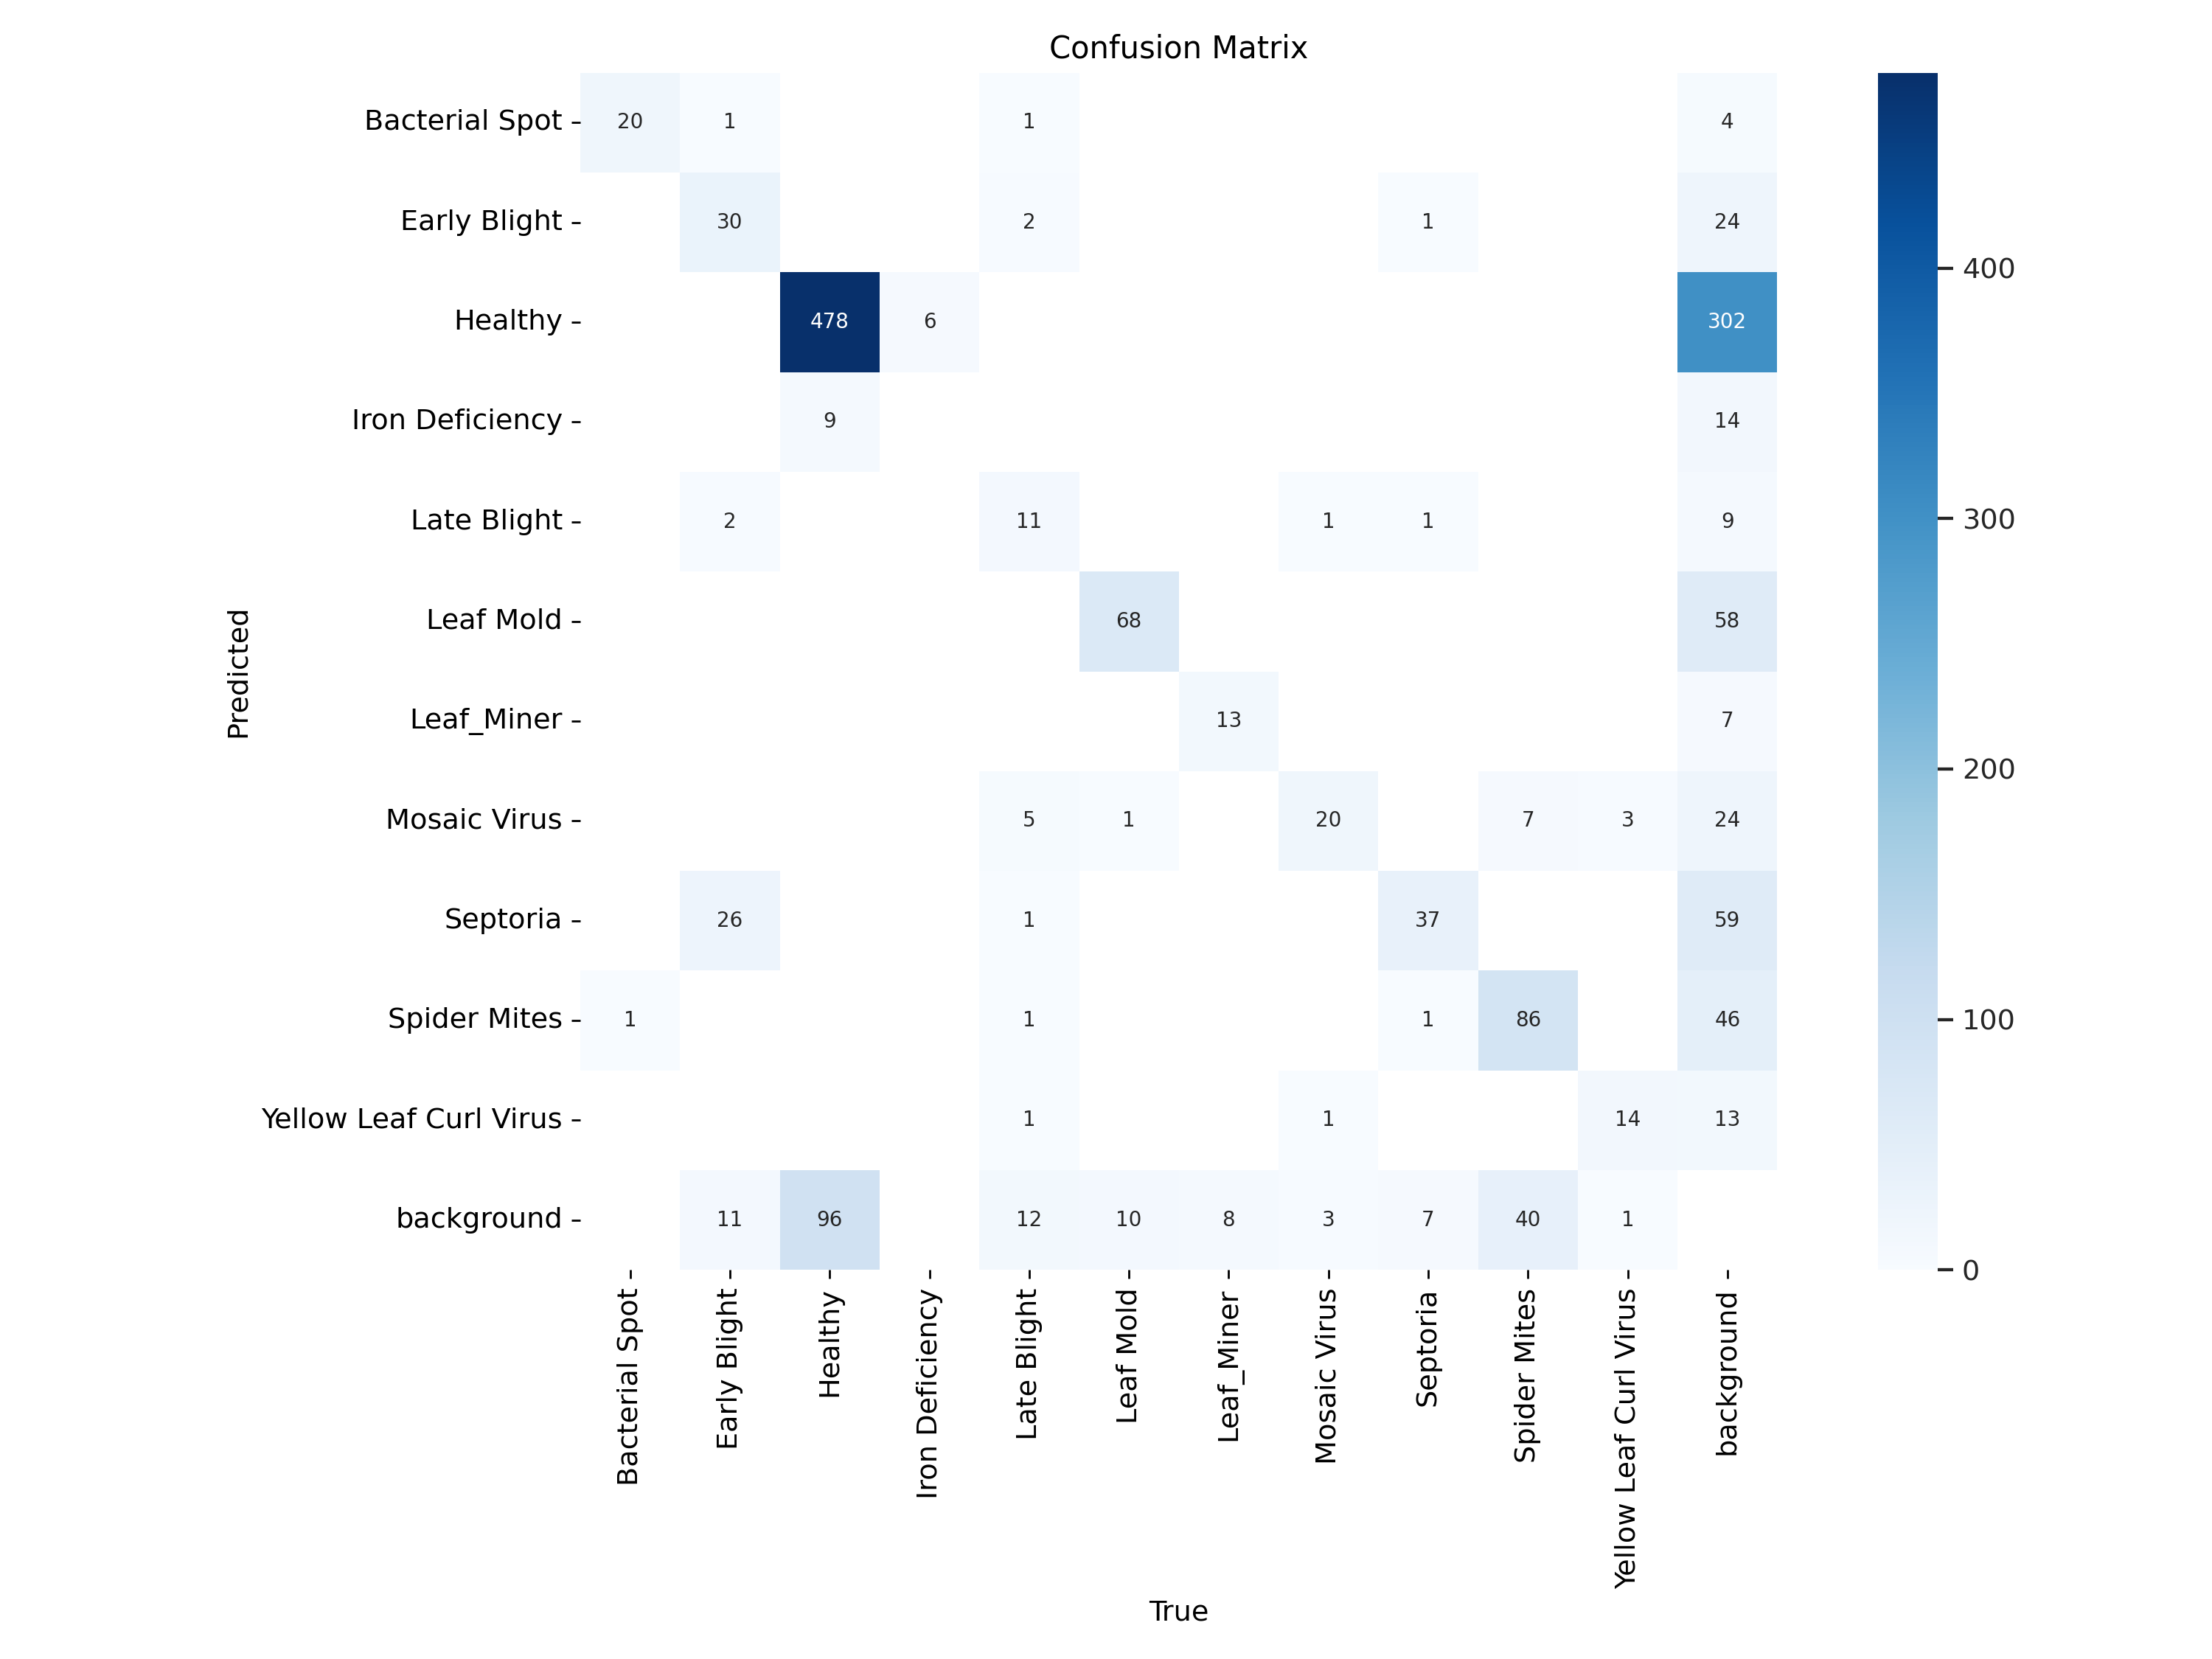

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=900)

**Training and Validation Loss**

/content


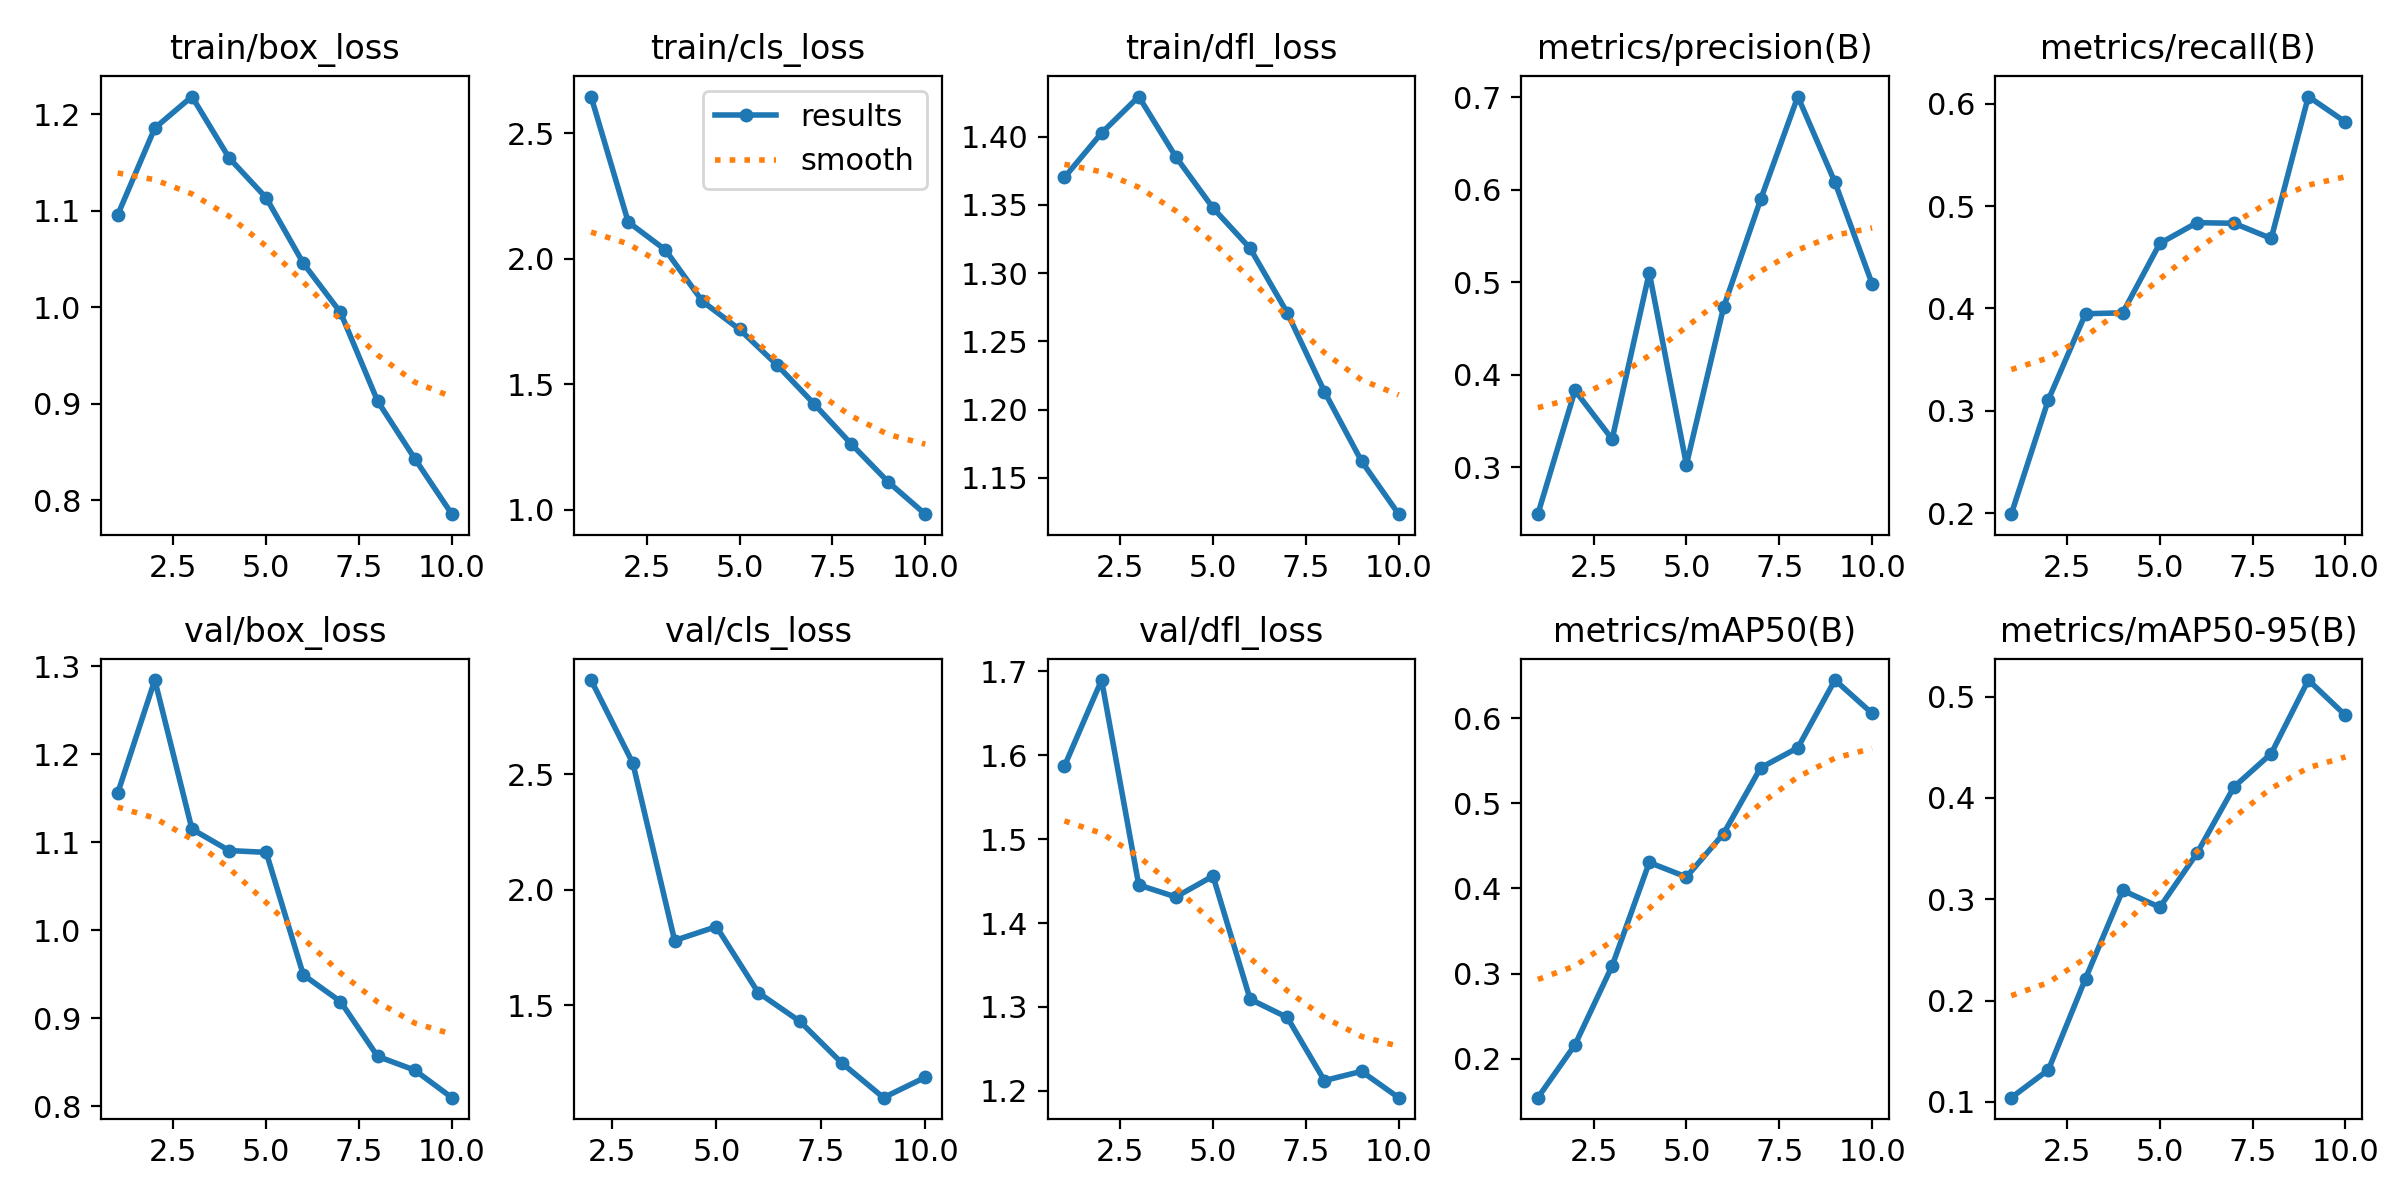

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


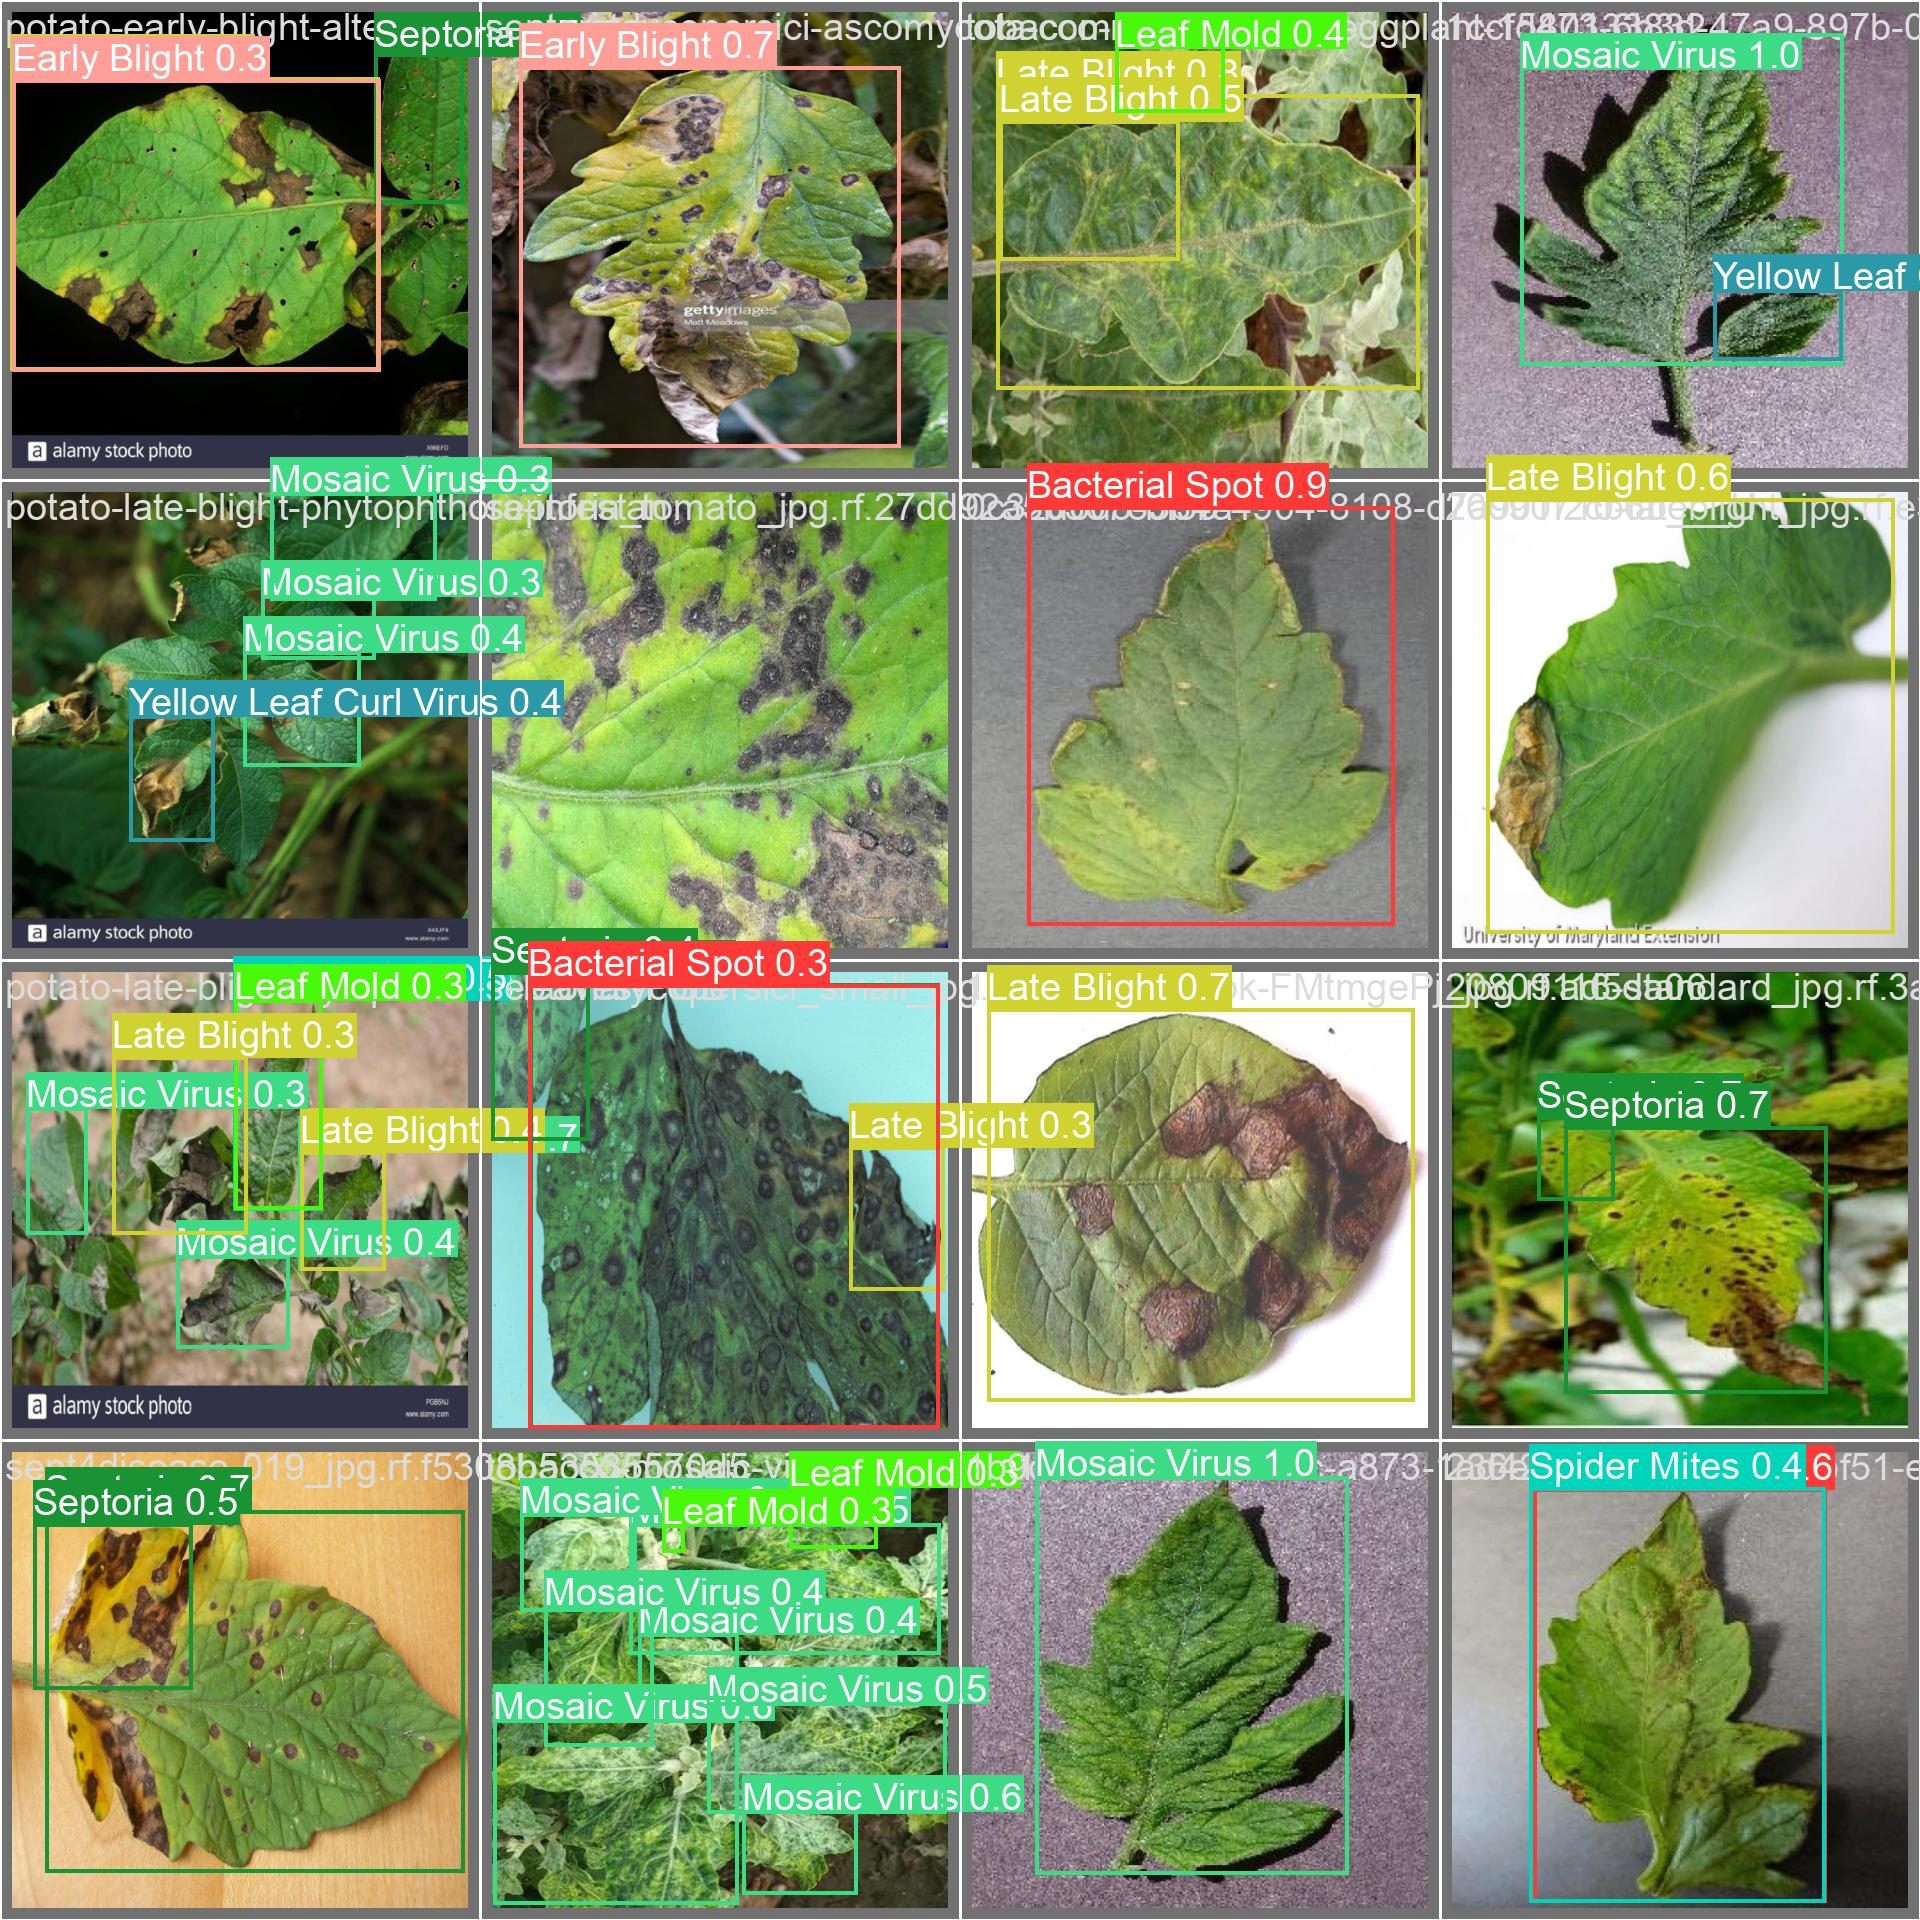

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/content


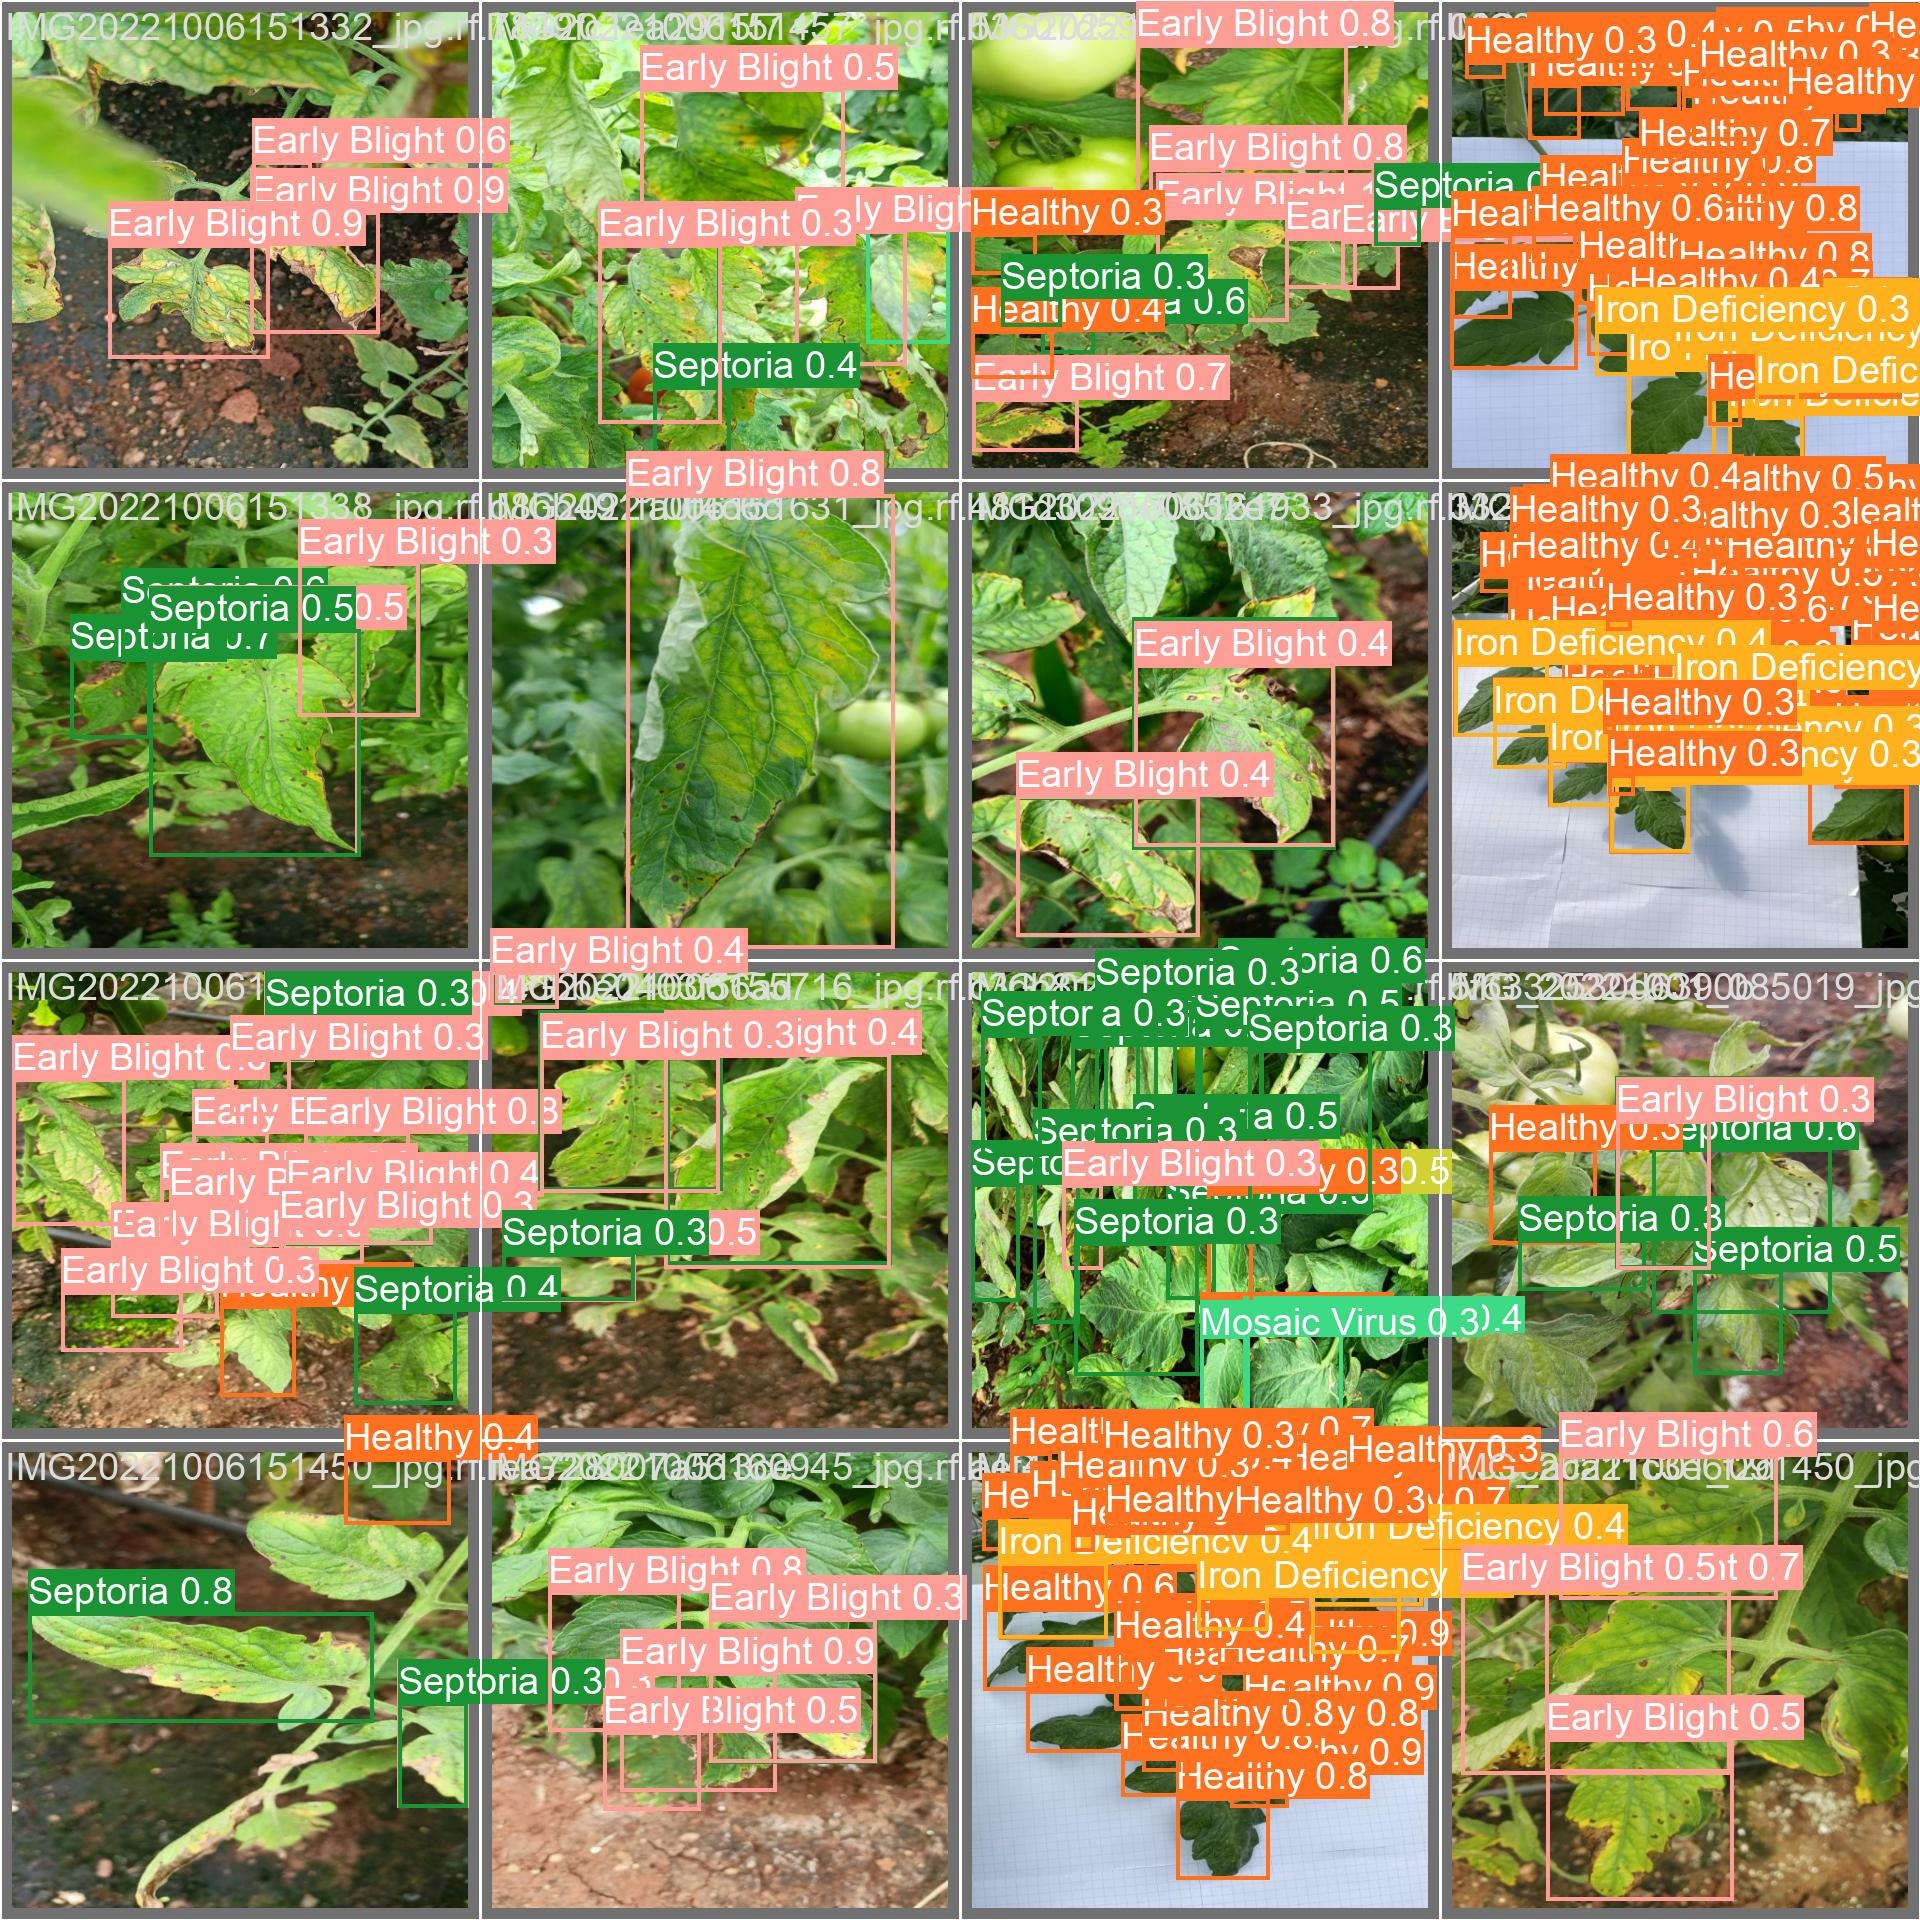

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

/content


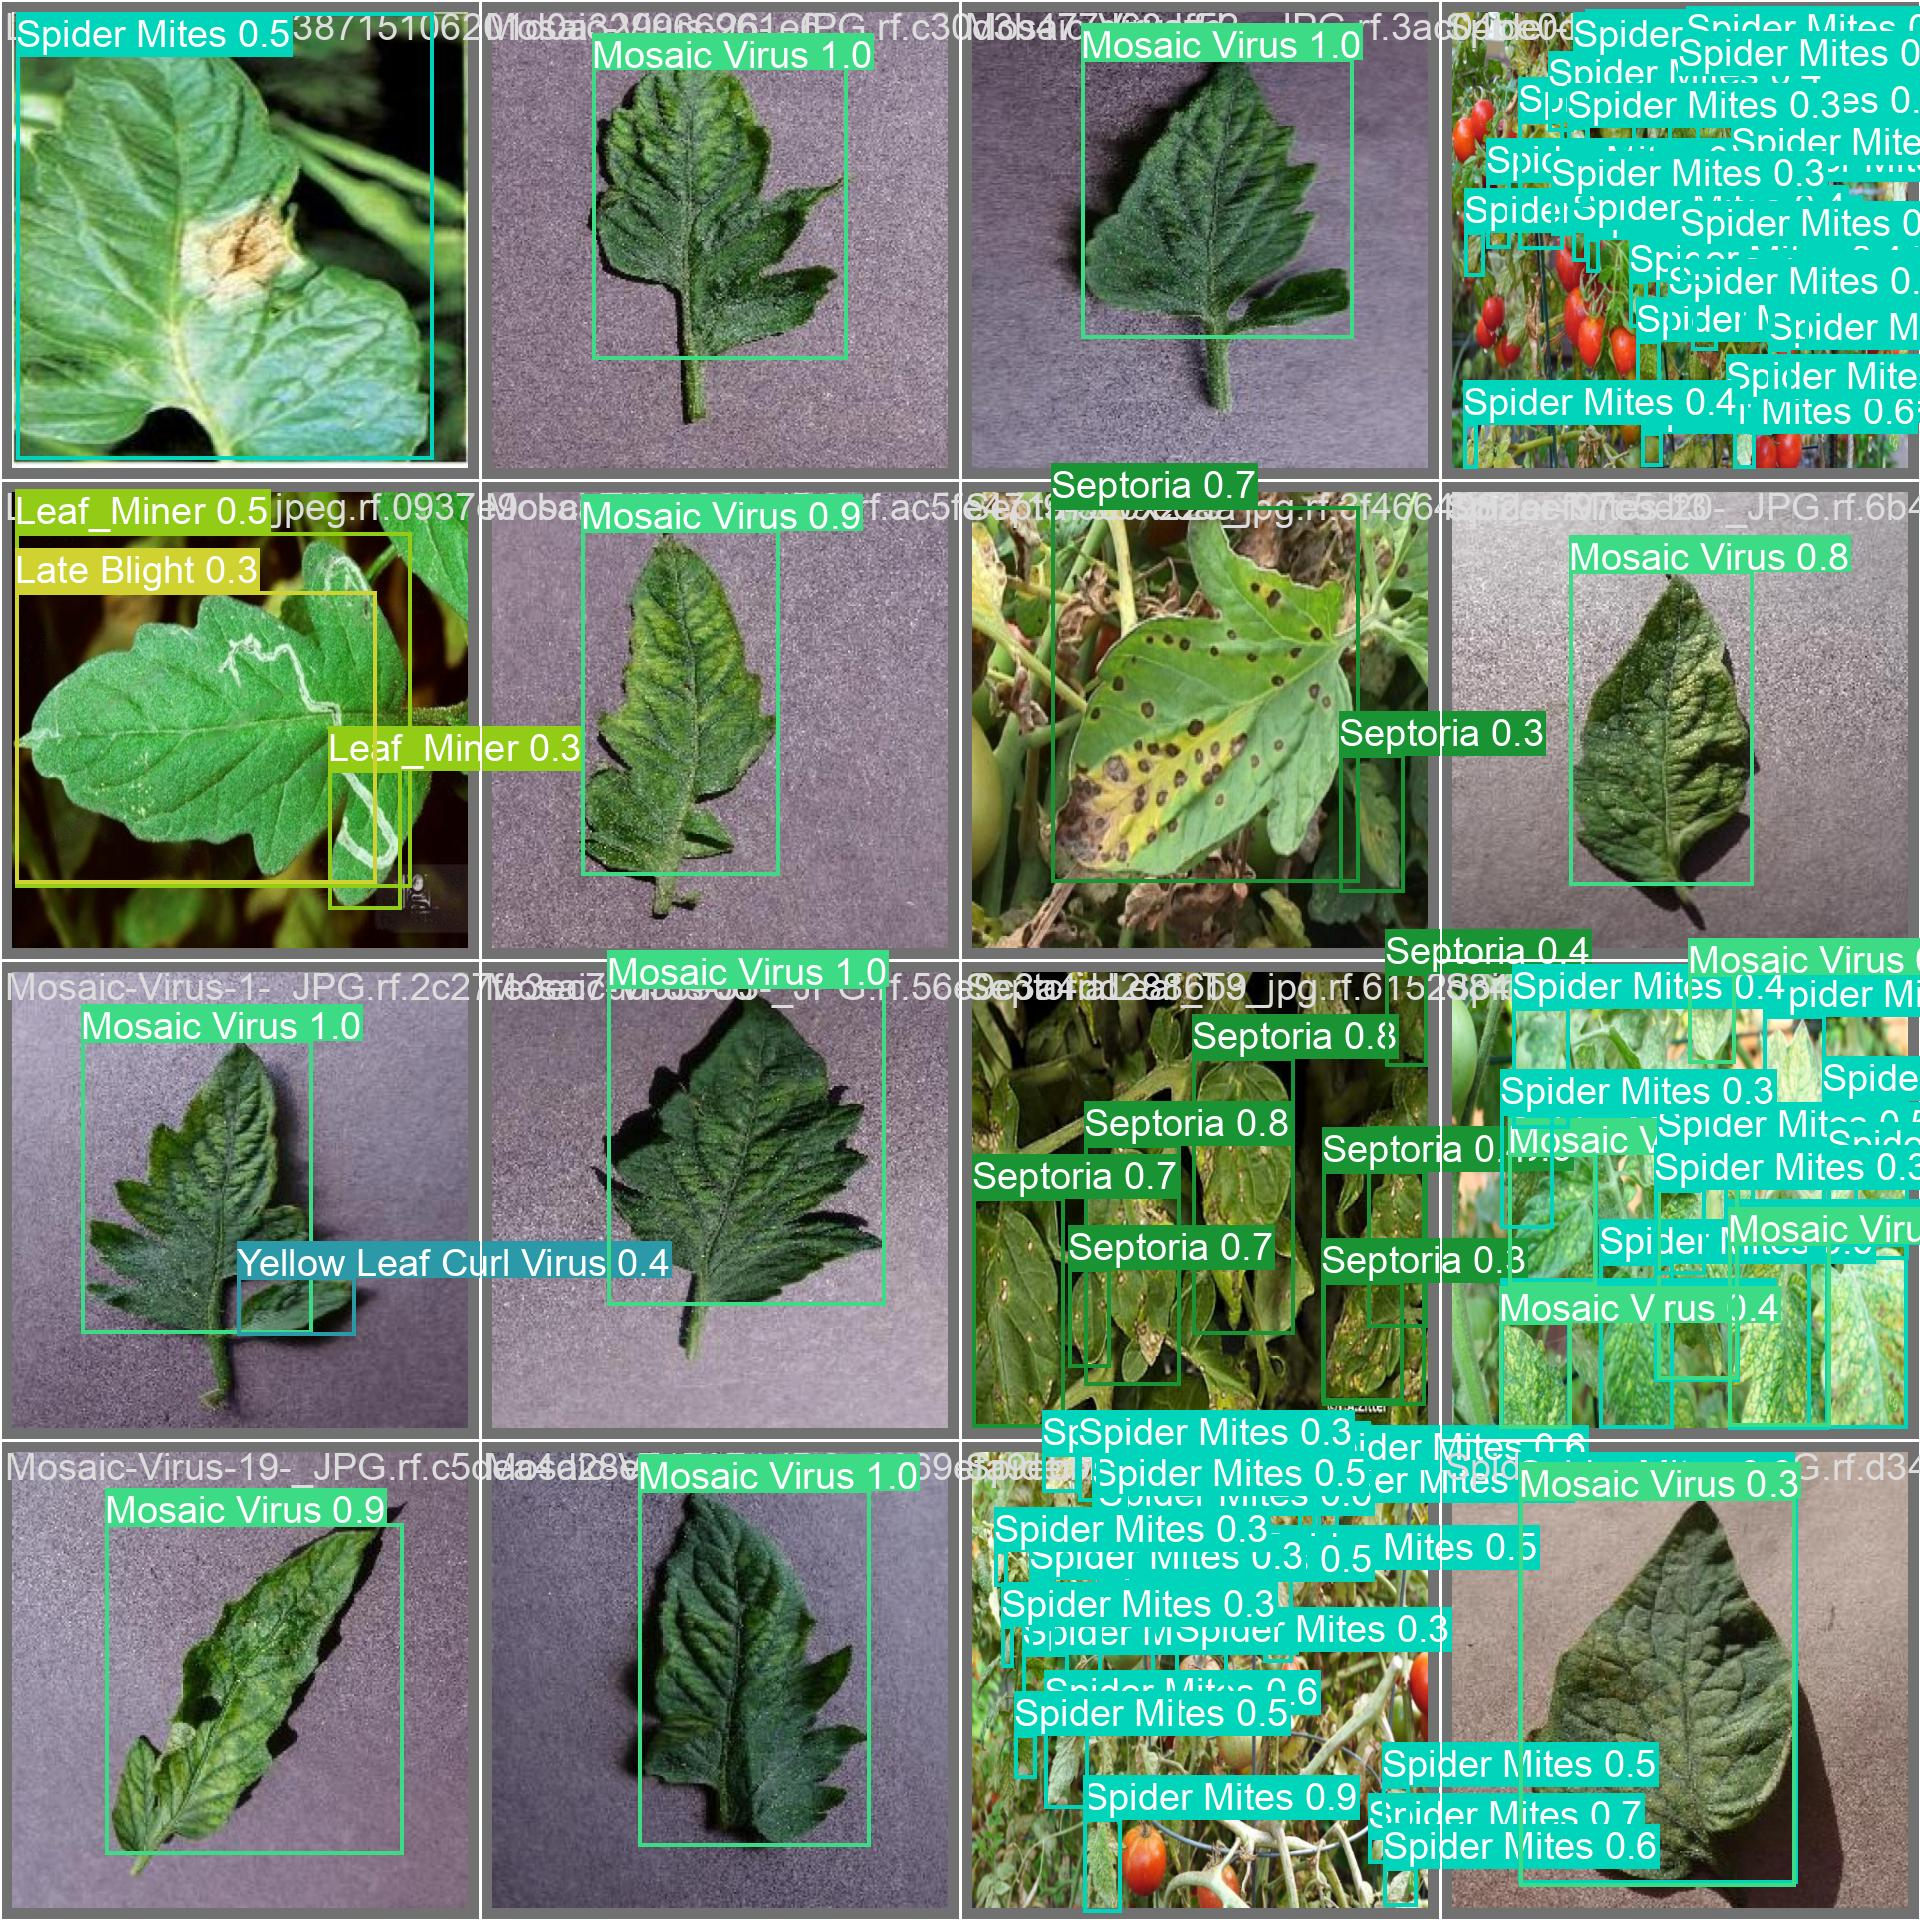

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

**Validate Custom Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/datasets/Tomatoes_leaf_diseases/data.yaml

/content
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/datasets/Tomatoes_leaf_diseases/valid/labels.cache... 174 images, 0 backgrounds, 0 corrupt: 100% 174/174 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:12<00:00,  1.11s/it]
                   all        174       1037      0.608      0.606      0.644      0.516
        Bacterial Spot        174         21      0.856          1      0.978      0.894
          Early Blight        174         70      0.657      0.414      0.562      0.402
               Healthy        174        583      0.737      0.765      0.808        0.6
       Iron Deficiency        174          6          0          0     0.0632     0.0602
           Late Blight        174         34      0.805      0.382      0.568      0.499
             Leaf

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Tomatoes_leaf_diseases/valid/images

/content
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs

image 1/174 /content/datasets/Tomatoes_leaf_diseases/valid/images/086dd5ed-279a-458b-aa4a-1484305ac21c___UF-GRC_BS_Lab-Leaf-8835_JPG.rf.cbdef98145a742fcbaa5a87409b7ee7f.jpg: 608x608 1 Bacterial Spot, 66.5ms
image 2/174 /content/datasets/Tomatoes_leaf_diseases/valid/images/0c32d6d5-bf5b-4904-8108-d7a901f2cb6b___UF-GRC_BS_Lab-Leaf-8662_JPG.rf.837d96d1507d721f3a9566b850ecf63c.jpg: 608x608 1 Bacterial Spot, 61.7ms
image 3/174 /content/datasets/Tomatoes_leaf_diseases/valid/images/1421_0_jpeg-itok-FMtmgePj_jpg.rf.ad5da06b631a2b67acb589842df769fb.jpg: 608x608 1 Late Blight, 61.7ms
image 4/174 /content/datasets/Tomatoes_leaf_diseases/valid/images/1b9dc07a-40ab-45bc-a873-1ad4212e35a3___PSU_CG-2289_JPG.rf.df350df942ac3c9aaf1399cc3e6384aa.jpg: 608x608 1 Mosaic Virus, 61.7ms
image 5/174 /content/datasets/Tomatoes_leaf_dis

**Inference with Custom Model**

In [ ]:
from IPython.display import Image

/content


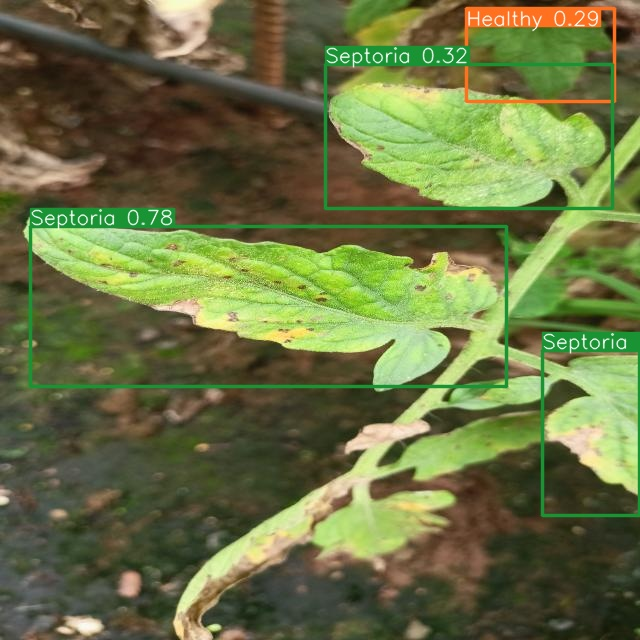

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/IMG20221006151450_jpg.rf.fea728007a513cef4d925abec7acb387.jpg', width=600)

/content


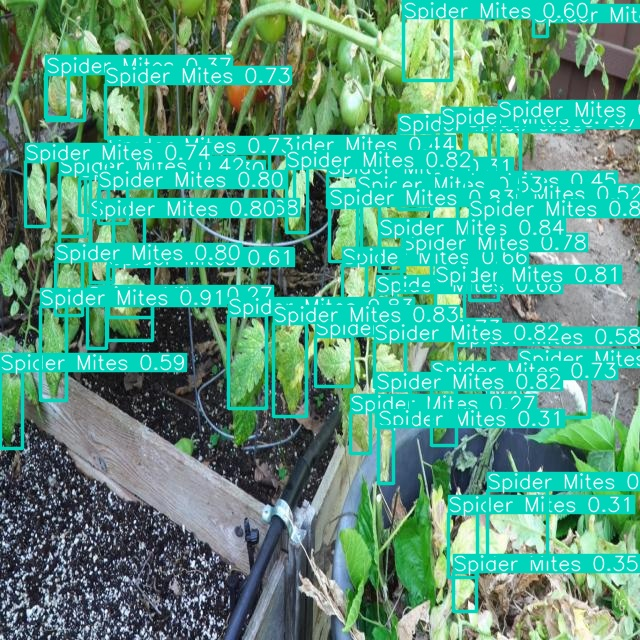

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/Spider-Mites-5-_png.rf.b5c8533cbf015db8ea52662c33037fb4.jpg', width=600)

/content


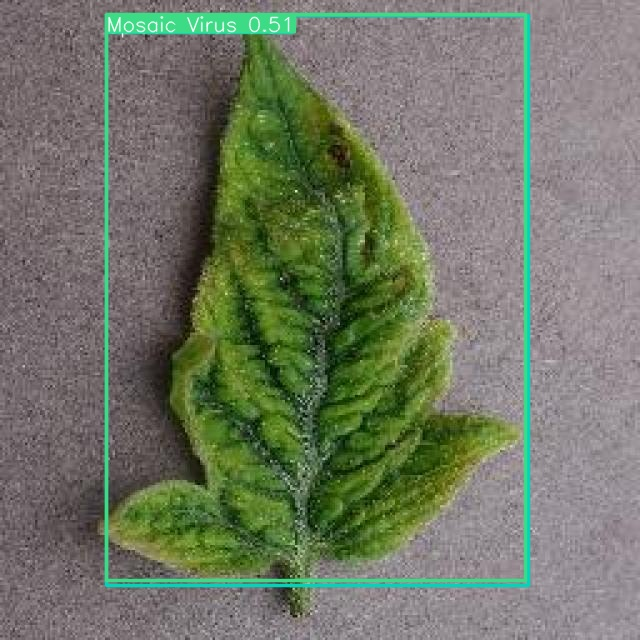

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/Yellow-Leaf-Curl-Virus-90-_JPG.rf.64d7e113fd0476e93503b894a94e99cb.jpg', width=600)

/content


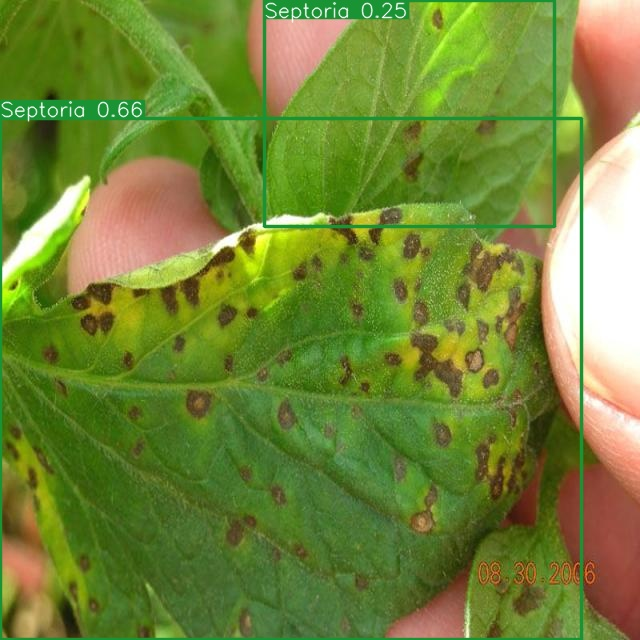

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/tomato-blight-treatment-blight_jpg.rf.90bd2bf4b412b58572c01d77bd6ac372.jpg', width=600)

/content


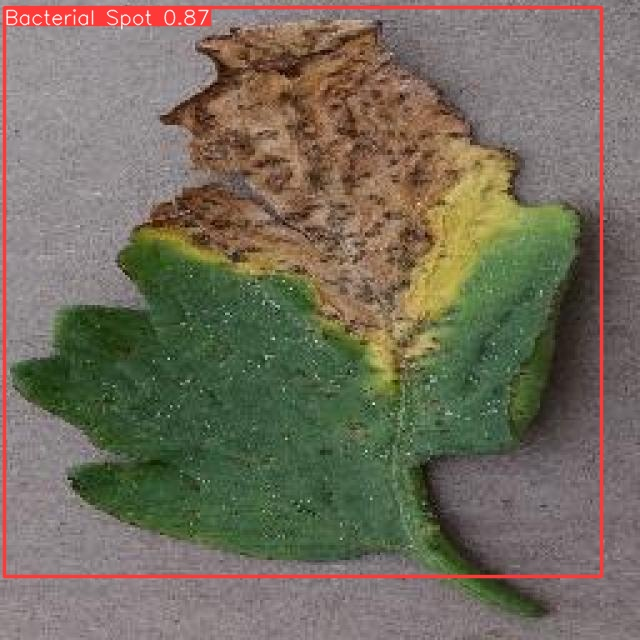

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/e28b2c59-c08e-4957-975f-2965d8b801e2___GCREC_Bact-Sp-3321_JPG.rf.3c82ac4b3d0fb3dd1d89aa8dd49d6531.jpg', width=600)

/content


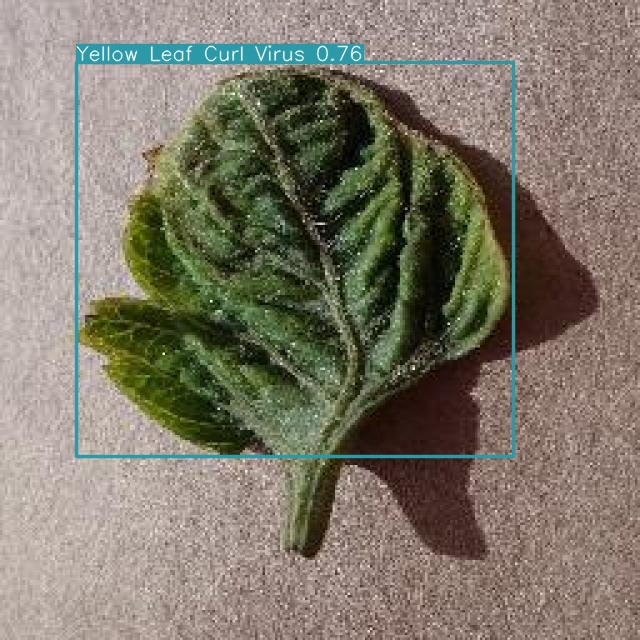

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/Yellow-Leaf-Curl-Virus-77-_JPG.rf.9c3ae7f0a2875edf2c0289416868cc58.jpg', width=600)

/content


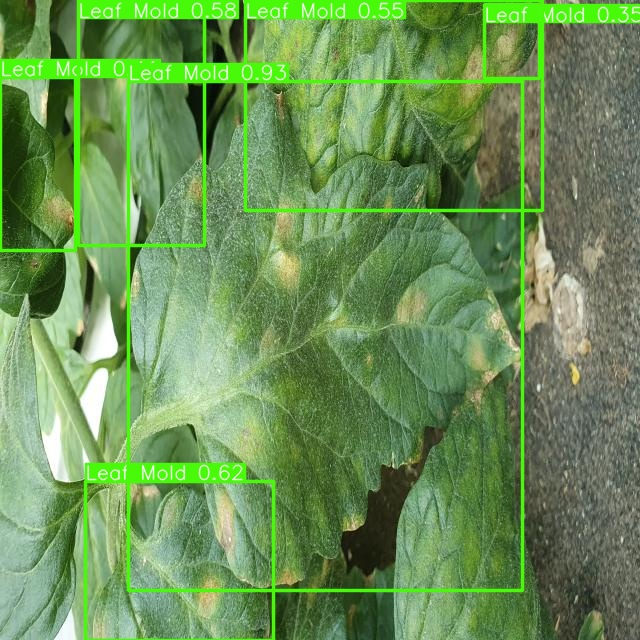

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/V006_77_1_18_11_03_13_1_8419w_20200920_32_jpg.rf.14289cc978fddd2700ef3de18d5b5b44.jpg', width=600)

/content


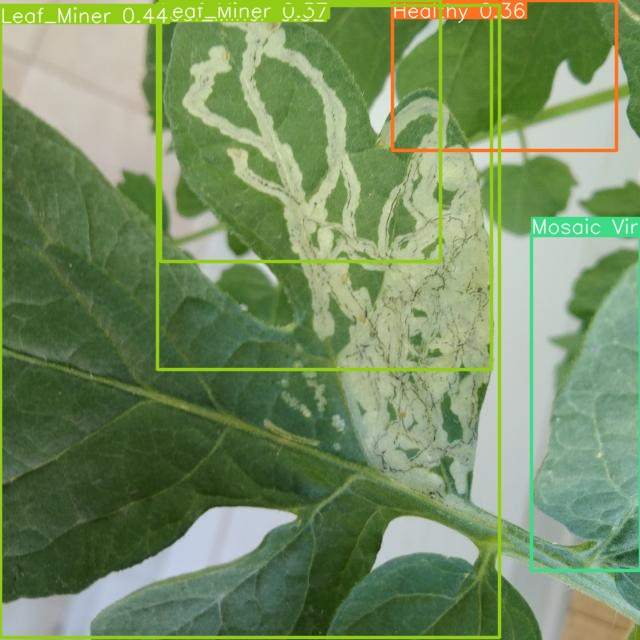

In [ ]:
%cd {HOME}
Image(filename=f'/content/runs/detect/predict/IMG_20221231_102210_jpg.rf.649a60cea45ba6337b50d56bb3153c2b.jpg', width=600)

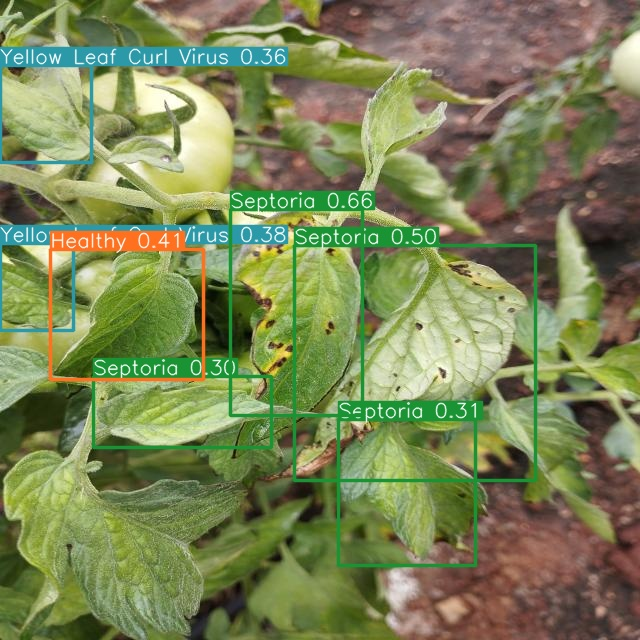

In [ ]:
Image(filename=f'/content/runs/detect/predict/IMG_20221001_085019_jpg.rf.d6d4b5a1e3a1a164dfe1d4258cad7381.jpg', width=600)

**Testing on a Demo Video**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/Leaf_disease.mp4'

/content
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs

video 1/1 (frame 1/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 120.8ms
video 1/1 (frame 2/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 3/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.6ms
video 1/1 (frame 4/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 5/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 6/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 7/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 28.0ms
video 1/1 (frame 8/210) /content/Leaf_disease.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 28.1ms
video 1/1 (frame 9/210) /content/Leaf_disease.mp4: 3

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/leaf_disease_1.mp4'

/content
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs

video 1/1 (frame 1/210) /content/leaf_disease_1.mp4: 352x608 1 Mosaic Virus, 121.2ms
video 1/1 (frame 2/210) /content/leaf_disease_1.mp4: 352x608 1 Mosaic Virus, 1 Yellow Leaf Curl Virus, 38.7ms
video 1/1 (frame 3/210) /content/leaf_disease_1.mp4: 352x608 1 Healthy, 1 Mosaic Virus, 38.7ms
video 1/1 (frame 4/210) /content/leaf_disease_1.mp4: 352x608 1 Healthy, 1 Mosaic Virus, 38.8ms
video 1/1 (frame 5/210) /content/leaf_disease_1.mp4: 352x608 1 Healthy, 2 Mosaic Viruss, 28.1ms
video 1/1 (frame 6/210) /content/leaf_disease_1.mp4: 352x608 1 Healthy, 2 Mosaic Viruss, 28.1ms
video 1/1 (frame 7/210) /content/leaf_disease_1.mp4: 352x608 1 Healthy, 2 Mosaic Viruss, 28.1ms
video 1/1 (frame 8/210) /content/leaf_disease_1.mp4: 352x608 3 Mosaic Viruss, 26.9ms
video 1/1 (frame 9/210) /content/leaf_disease_1.mp4: 352x608 1 

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/Late_blight_video.mp4'

/content
Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs

video 1/1 (frame 1/210) /content/Late_blight_video.mp4: 352x608 (no detections), 126.8ms
video 1/1 (frame 2/210) /content/Late_blight_video.mp4: 352x608 (no detections), 38.7ms
video 1/1 (frame 3/210) /content/Late_blight_video.mp4: 352x608 1 Mosaic Virus, 38.7ms
video 1/1 (frame 4/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 38.7ms
video 1/1 (frame 5/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 38.7ms
video 1/1 (frame 6/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 38.8ms
video 1/1 (frame 7/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 38.7ms
video 1/1 (frame 8/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 28.5ms
video 1/1 (frame 9/210) /content/Late_blight_video.mp4: 352x608 1 Late Blight, 28.5ms
video 1/1 (frame 10/210) /content/Late_bl

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source='/content/leaf_disease_2.mp4'

Ultralytics YOLOv8.1.33 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43615089 parameters, 0 gradients, 164.9 GFLOPs

video 1/1 (frame 1/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 212.5ms
video 1/1 (frame 2/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.9ms
video 1/1 (frame 3/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 4/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 5/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 6/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 7/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 8/210) /content/leaf_disease_2.mp4: 352x608 1 Bacterial Spot, 1 Septoria, 38.7ms
video 1/1 (frame 9/210) /content/leaf_disease